In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
filedict={'g345' : 'dl_G345/datas/modulus_and_damping_ratio.csv',
'g375' : 'dl_G375/datas/modulus_and_damping_ratio.csv',
'g375_1' : 'dl_G375_1/datas/modulus_and_damping_ratio.csv'}
for k, d in enumerate(filedict):
    print(k,d,filedict[d])

0 g345 dl_G345/datas/modulus_and_damping_ratio.csv
1 g375 dl_G375/datas/modulus_and_damping_ratio.csv
2 g375_1 dl_G375_1/datas/modulus_and_damping_ratio.csv


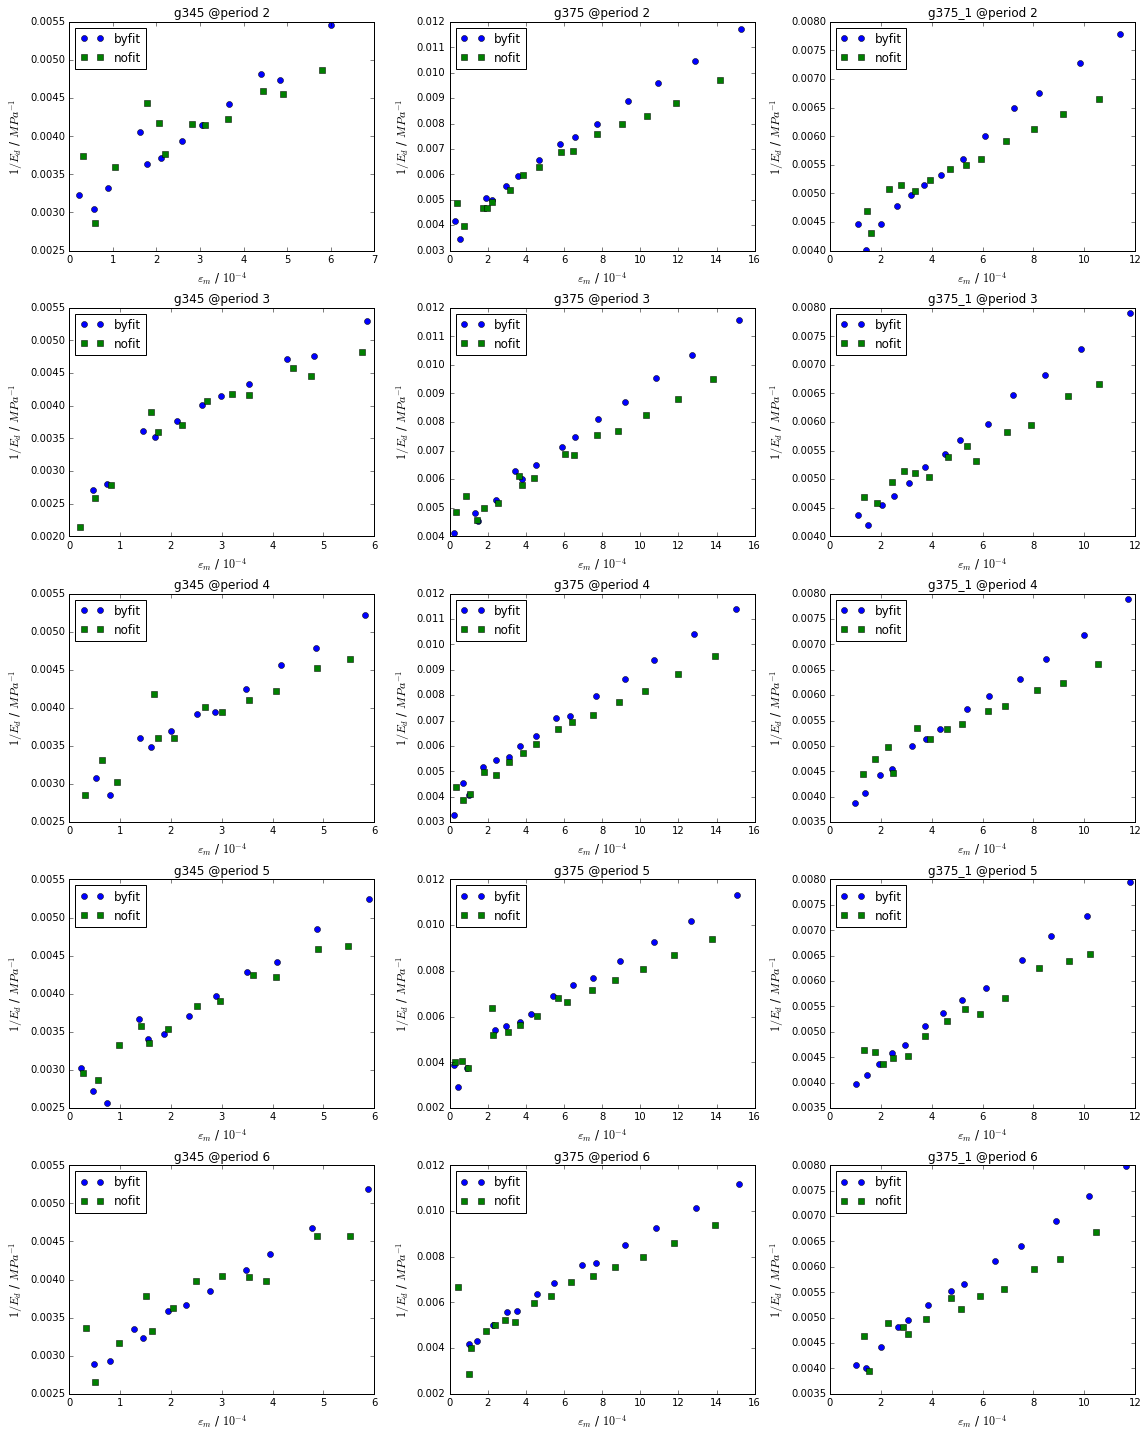

In [13]:
plt.figure(figsize=(16,20),dpi=300)
for i, k in enumerate(filedict):
    df = pd.read_csv(filedict[k], encoding='gb2312', header=[0,1], tupleize_cols=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    for p, col in enumerate('23456'):
        data = df[col]
        
        plt.subplot(5,3,3*p+i+1)
        plt.plot(data['epsilon_m_byfit'][1:]*1e4, 1000/data['modulus_byfit'][1:],'o',label='byfit')
        plt.plot(data['epsilon_m'][1:]*1e4, 1000/data['modulus'][1:],'s',label='nofit')
        plt.legend(loc=0)
        plt.ylabel(r'$1/E_d$ / $MPa^{-1}$', fontsize=12)
        plt.xlabel(r'$\varepsilon_m$ / $10^{-4}$', fontsize=12)
        plt.title('{0} @period {1}'.format(k, col))
plt.tight_layout()
plt.savefig('figs/')